In [3]:
import os, sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

In [4]:
import matplotlib.pyplot as plt

In [6]:
def get_best_graph(results,
                   models,
                   distributions,
                   distance_metrics,
                   num_epochs):
    # TODO: fix save error, legend, make pretty
    for metric in distance_metrics:
        for model_name, module in models.items():
            for dist in distributions:
                data = results[model_name][dist][metric]['value']
                print(model_name, dist, metric, data)
                plt.plot(np.linspace(1, num_epochs, len(data)), data, label=dist)

            plt.xlabel("Epoch")
            plt.ylabel(metric)
            plt.title("{0}: {1}".format(model_name.upper(), metric))
            plt.legend(loc="best")
            plt.savefig('graphs/multivariate/{0}_{1}.png'.format(metric, model_name), dpi=100)
            plt.clf()

In [7]:
import json

In [77]:
with open('/Users/sob/Desktop/mnist_ci/data.json', encoding='utf-8') as data_file:
    results = json.loads(data_file.read())

In [26]:
results.keys()

dict_keys(['wgan', 'wgpgan', 'nsgan', 'lsgan', 'mmgan', 'dragan', 'began', 'ragan', 'infogan', 'fishergan', 'fgan_forward_kl', 'fgan_reverse_kl', 'fgan_jensen_shannon', 'fgan_total_var', 'fgan_hellinger', 'fgan_pearson', 'vae'])

In [13]:
distance_metrics = ["KL-Divergence", "Jensen-Shannon", "Wasserstein-Distance", "Energy-Distance"]

In [15]:
models = {
    "wgan": 'w_gan',
    "wgpgan": 'w_gp_gan',
    "nsgan": 'ns_gan',
    "lsgan": 'ls_gan',
    "mmgan": 'mm_gan',
    "dragan": 'dra_gan',
    "began": 'be_gan',
    "ragan": 'ra_gan',
    "infogan": 'info_gan',
    "fishergan": 'fisher_gan',
    "fgan_forward_kl": 'forkl_gan',
    "fgan_reverse_kl": 'revkl_gan',
    "fgan_jensen_shannon": 'js_gan',
    "fgan_total_var": 'tv_gan',
    "fgan_hellinger": 'hellinger_gan',
    "fgan_pearson": 'pearson_gan',
    "vae": 'vae',
    "autoencoder": 'ae',
}

In [90]:
import os

In [146]:
# def get_confidence_intervals_multivariate(data_type):
mypath = "/Users/sob/Desktop/mnist_best/"
files = [f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]
results = []
for file in files:
    print(file)
    with open("{}/{}".format(mypath, file)) as f:
        data = json.load(f)
    results.append(data)
    data2 = data

# optimal = nested_pickle_dict()
# for result in results:
#     for model, distributions in result.items():
#         for dist, metrics in distributions.items():
#             for metric, values in metrics.items():
#                 if metric not in optimal[model][distribution]:
#                     optimal[model][dist][metric] = {"original": []}
#                 optimal[model][dist][metric]["original"].append(values['value'])

# for result in results:
#     for model, distributions in result.items():
#         for distribution, metrics in distributions.items():
#             for metric, values in metrics.items():
#                 data = np.array(optimal[gan][distribution][metric]["original"])
#                 optimal[gan][distribution][metric]['5'] = list(np.percentile(data, 5, axis=0))
#                 optimal[gan][distribution][metric]['95'] = list(np.percentile(data, 95, axis=0))

# #     return optimal

results_0_2018-09-10.json
False
results_10_2018-09-15.json
True
results_11_2018-09-16.json
True
results_12_2018-09-16.json
True
results_13_2018-09-16.json
True
results_14_2018-09-16.json
True
results_15_2018-09-17.json
True
results_16_2018-09-17.json
True
results_17_2018-09-17.json
True
results_18_2018-09-18.json
True
results_19_2018-09-18.json
True
results_1_2018-09-11.json
True
results_2_2018-09-11.json
True
results_3_2018-09-12.json
True
results_4_2018-09-12.json
True
results_5_2018-09-13.json
True
results_6_2018-09-13.json
True
results_7_2018-09-13.json
True
results_8_2018-09-14.json
True
results_9_2018-09-14.json
True


In [145]:
optimal['vae']['mnist']

defaultdict(<function __main__.nested_pickle_dict()>,
            {'KL-Divergence': {'original': [[13.31015396118164,
                209123.4375,
                3579.475830078125,
                23.826717376708984,
                31.682815551757812,
                49.117431640625,
                65.2401123046875,
                75.97317504882812,
                83.44593811035156,
                94.21187591552734,
                112.09374237060547,
                134.44093322753906,
                158.51162719726562,
                183.0552215576172,
                209.13241577148438,
                236.06417846679688,
                262.9582214355469,
                290.34417724609375,
                317.7198791503906,
                344.3808288574219,
                370.65191650390625,
                395.8968811035156,
                419.9552307128906,
                442.0354309082031,
                461.88800048828125,
                479.26641845703125,
     

In [98]:
def nested_pickle_dict():
    """ Picklable defaultdict nested dictionaries """
    return defaultdict(nested_pickle_dict)

In [78]:
[min(np.array(results['wgan']['mnist']['KL-Divergence']['original'])[:, i]) for i in range(25)]

[0.062296099257532024,
 0.15536263996628144,
 0.14179874342892193,
 0.18677752460684366,
 0.2196490529649683,
 0.24036142532964588,
 0.20971130419913694,
 0.16155258515674656,
 0.046134596956921445,
 0.01162469800435197,
 0.04544392780067117,
 0.015306582309909327,
 0.016289950152262863,
 0.01479376475657102,
 0.012722657849183985,
 0.014349570723678783,
 0.009599749184631303,
 0.01633384616163688,
 0.00722289528142169,
 0.015867876620390516,
 0.012082117997146403,
 0.016028385821754566,
 0.026548838477049114,
 0.020614969087937945,
 0.010590943753898735]

In [75]:
results['wgan']['mnist']['KL-Divergence']['original'][0]

[0.062296099257532024,
 0.15536263996628144,
 0.14179874342892193,
 0.18677752460684366,
 0.2196490529649683,
 0.24036142532964588,
 0.20971130419913694,
 0.16155258515674656,
 0.046134596956921445,
 0.01162469800435197,
 0.04544392780067117,
 0.015306582309909327,
 0.016289950152262863,
 0.01479376475657102,
 0.012722657849183985,
 0.014349570723678783,
 0.009599749184631303,
 0.01633384616163688,
 0.00722289528142169,
 0.015867876620390516,
 0.012082117997146403,
 0.016028385821754566,
 0.026548838477049114,
 0.020614969087937945,
 0.010590943753898735]

In [39]:
# Get the confidence intervals of the model
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T

# Data for regions where we want to shade to indicate the intervals has
# to be sorted by the x axis to display correctly
CI_df = pd.DataFrame(columns = ['x_data', 'low_CI', 'upper_CI'])
CI_df['x_data'] = daily_data['temp']
CI_df['low_CI'] = predict_mean_ci_low
CI_df['upper_CI'] = predict_mean_ci_upp
CI_df.sort_values('x_data', inplace = True)

# Define a function for the line plot with intervals
def lineplotCI(x_data, y_data, sorted_x, low_CI, upper_CI, x_label, y_label, title):
    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the linewidth, color and transparency of the
    # line, provide a label for the legend
    ax.plot(x_data, y_data, lw = 1, color = '#539caf', alpha = 1, label = 'Fit')
    # Shade the confidence interval
    ax.fill_between(sorted_x, low_CI, upper_CI, color = '#539caf', alpha = 0.4, label = '95% CI')
    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    # Display legend
    ax.legend(loc = 'best')

# Call the function to create plot
lineplotCI(x_data = daily_data['temp']
           , y_data = fitted_values
           , sorted_x = CI_df['x_data']
           , low_CI = CI_df['low_CI']
           , upper_CI = CI_df['upper_CI']
           , x_label = 'Normalized temperature (C)'
           , y_label = 'Check outs'
           , title = 'Line of Best Fit for Number of Check Outs vs Temperature')

17

wgan mnist KL-Divergence


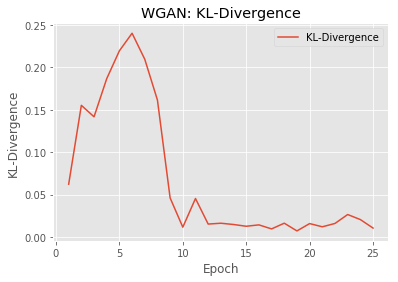

wgpgan mnist KL-Divergence


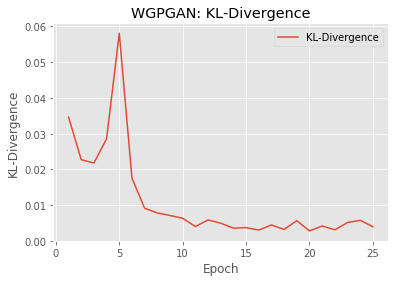

nsgan mnist KL-Divergence


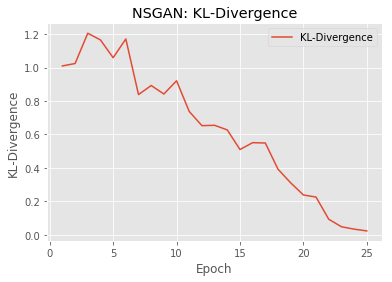

lsgan mnist KL-Divergence


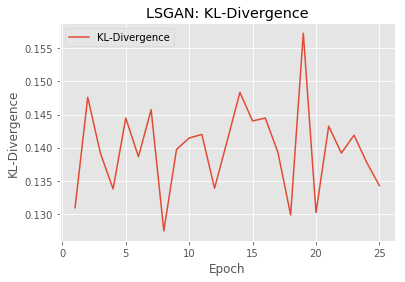

mmgan mnist KL-Divergence


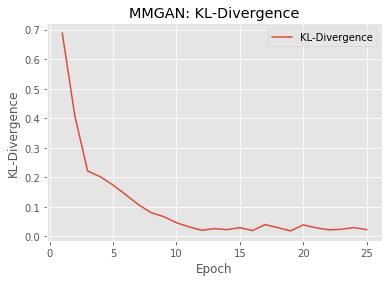

dragan mnist KL-Divergence


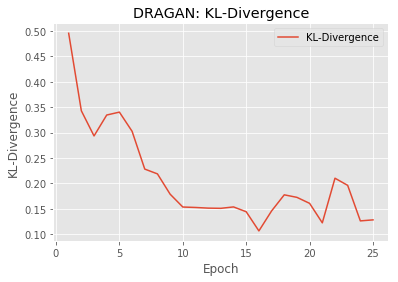

began mnist KL-Divergence


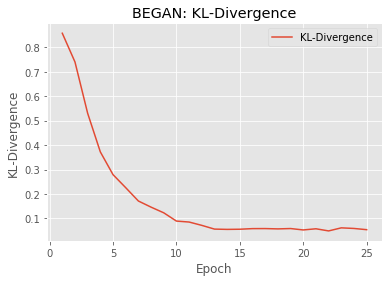

ragan mnist KL-Divergence


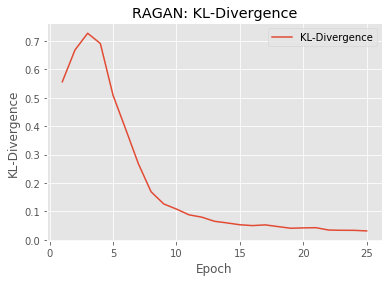

infogan mnist KL-Divergence


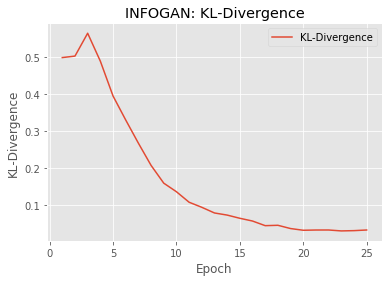

fishergan mnist KL-Divergence


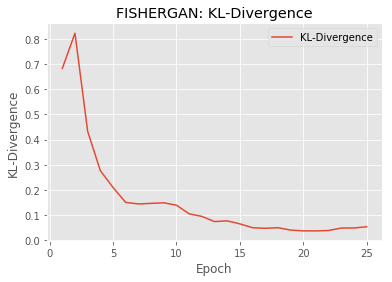

fgan_forward_kl mnist KL-Divergence


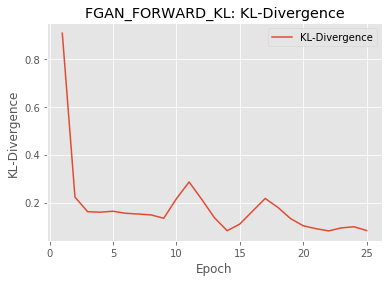

fgan_reverse_kl mnist KL-Divergence


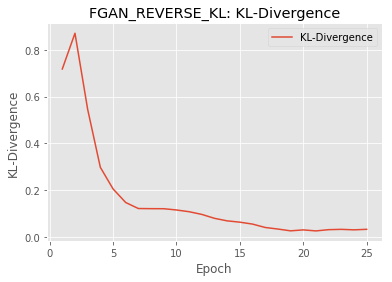

fgan_jensen_shannon mnist KL-Divergence


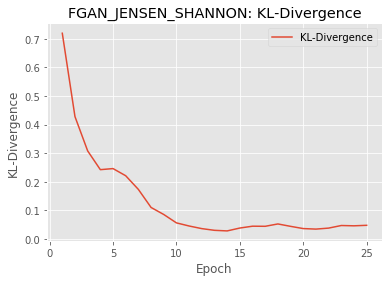

fgan_total_var mnist KL-Divergence


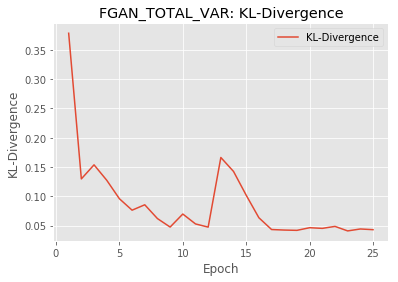

fgan_hellinger mnist KL-Divergence


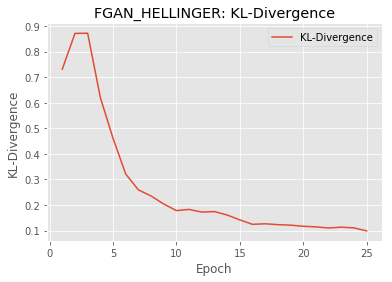

fgan_pearson mnist KL-Divergence


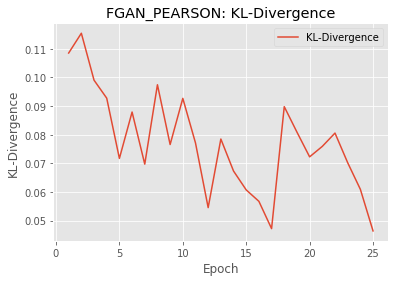

vae mnist KL-Divergence


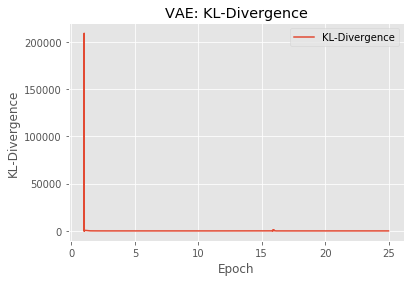

wgan mnist Jensen-Shannon


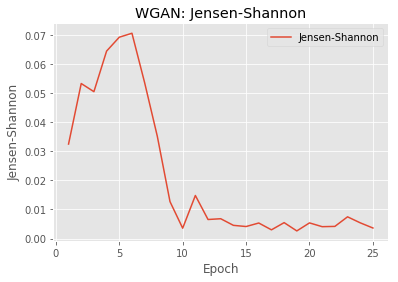

wgpgan mnist Jensen-Shannon


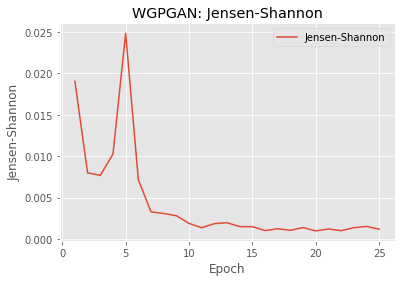

nsgan mnist Jensen-Shannon


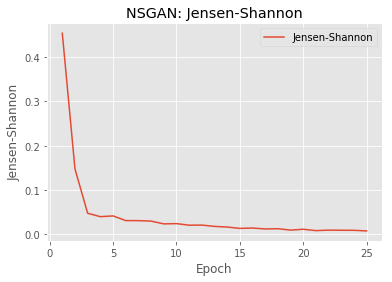

lsgan mnist Jensen-Shannon


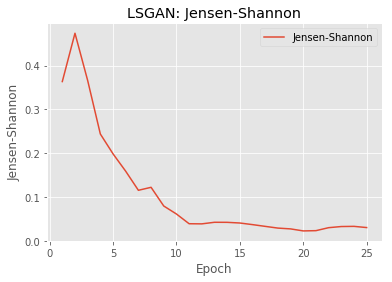

mmgan mnist Jensen-Shannon


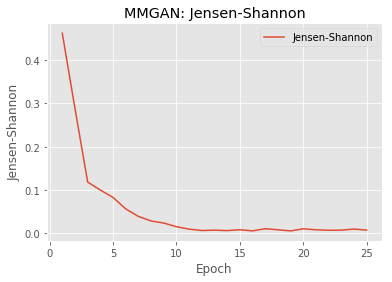

dragan mnist Jensen-Shannon


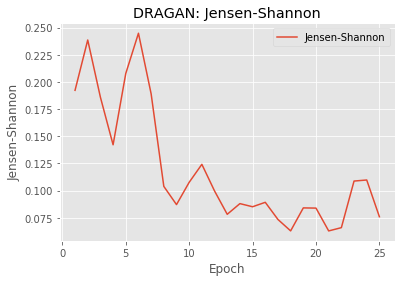

began mnist Jensen-Shannon


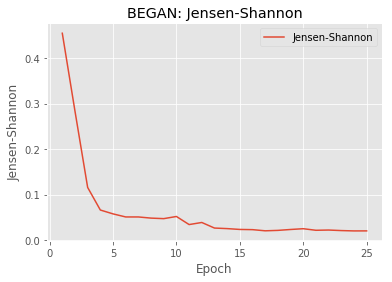

ragan mnist Jensen-Shannon


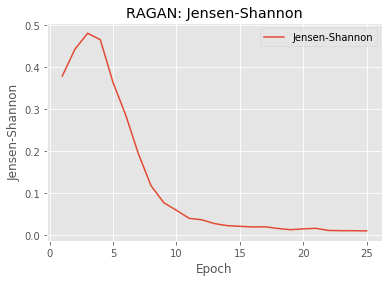

infogan mnist Jensen-Shannon


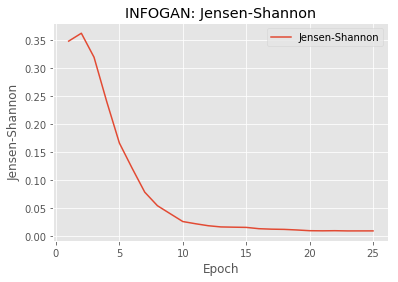

fishergan mnist Jensen-Shannon


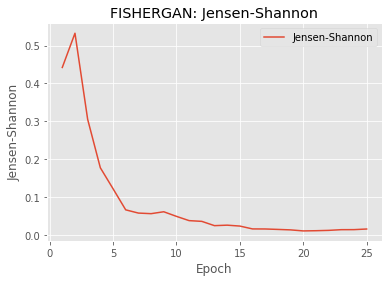

fgan_forward_kl mnist Jensen-Shannon


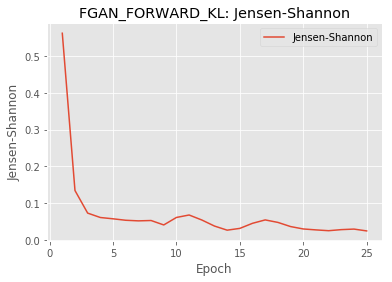

fgan_reverse_kl mnist Jensen-Shannon


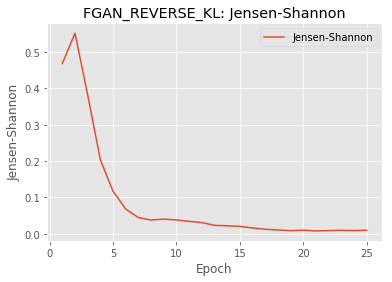

fgan_jensen_shannon mnist Jensen-Shannon


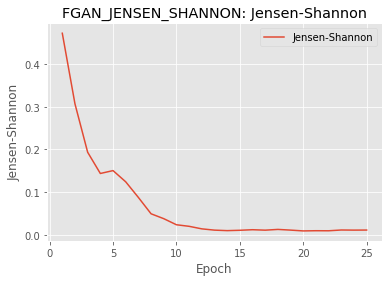

fgan_total_var mnist Jensen-Shannon


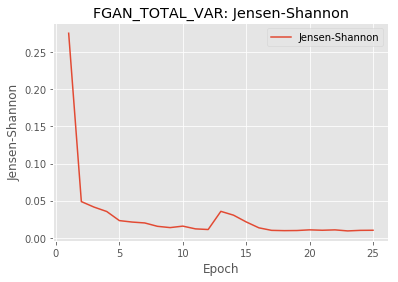

fgan_hellinger mnist Jensen-Shannon


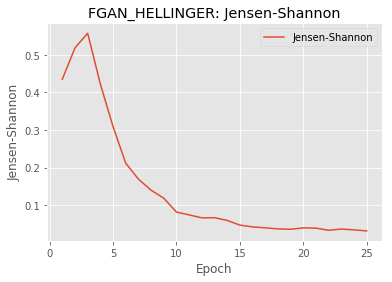

fgan_pearson mnist Jensen-Shannon


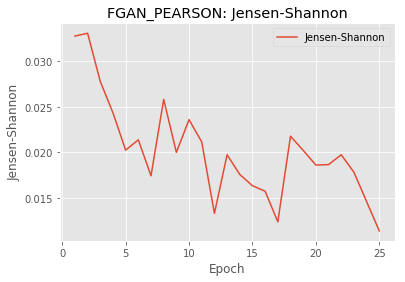

vae mnist Jensen-Shannon


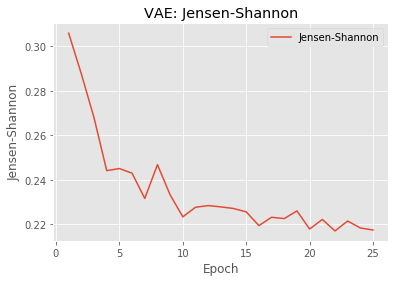

wgan mnist Wasserstein-Distance


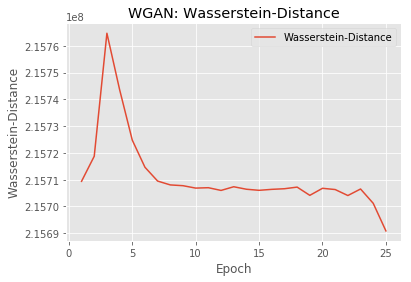

wgpgan mnist Wasserstein-Distance


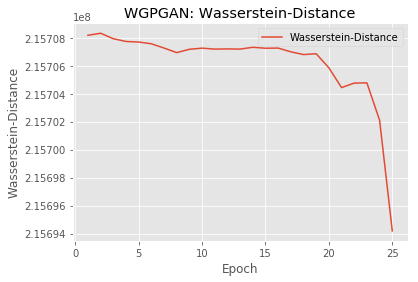

nsgan mnist Wasserstein-Distance


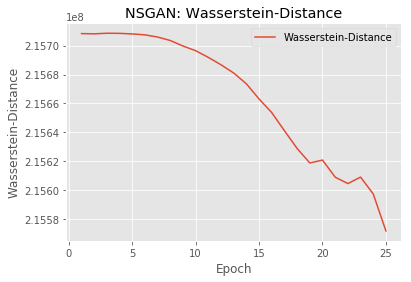

lsgan mnist Wasserstein-Distance


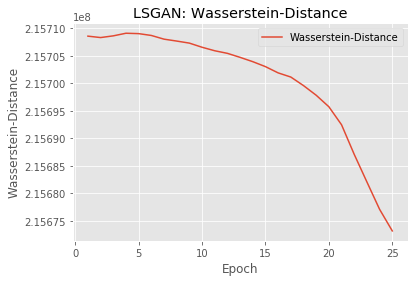

mmgan mnist Wasserstein-Distance


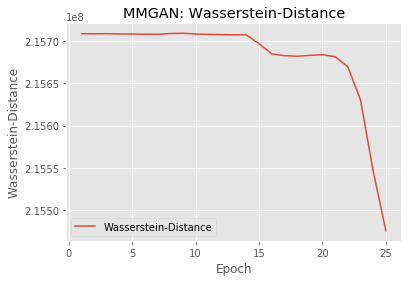

dragan mnist Wasserstein-Distance


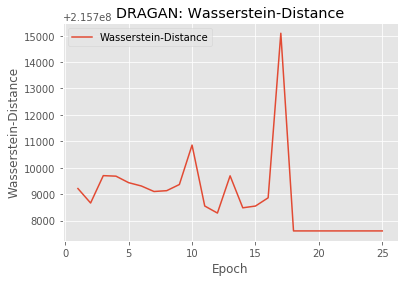

began mnist Wasserstein-Distance


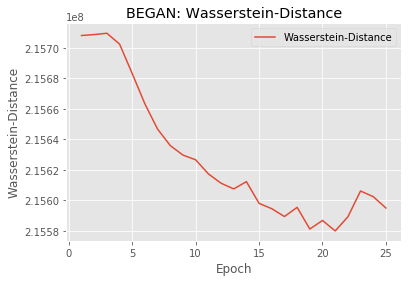

ragan mnist Wasserstein-Distance


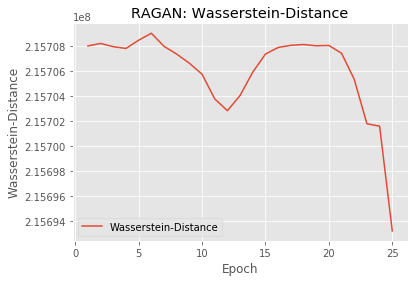

infogan mnist Wasserstein-Distance


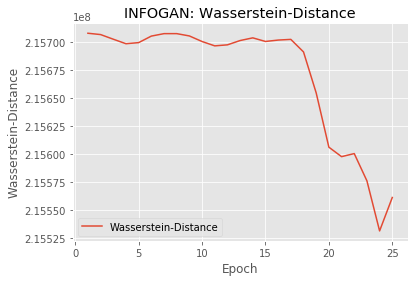

fishergan mnist Wasserstein-Distance


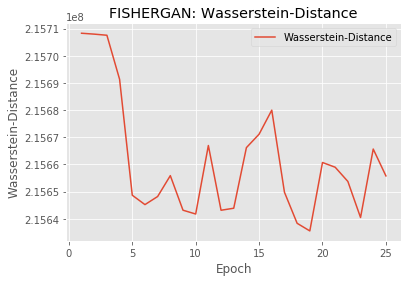

fgan_forward_kl mnist Wasserstein-Distance


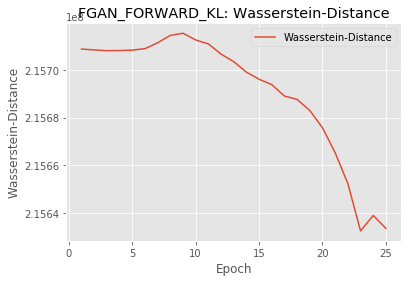

fgan_reverse_kl mnist Wasserstein-Distance


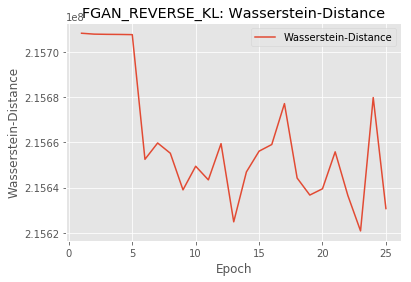

fgan_jensen_shannon mnist Wasserstein-Distance


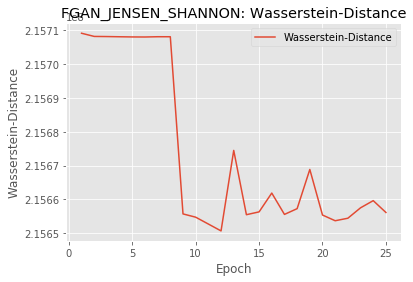

fgan_total_var mnist Wasserstein-Distance


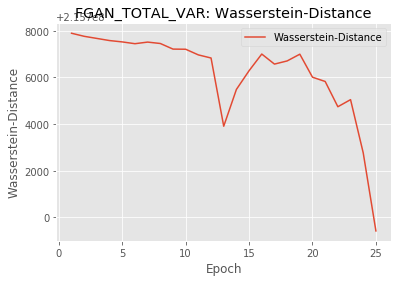

fgan_hellinger mnist Wasserstein-Distance


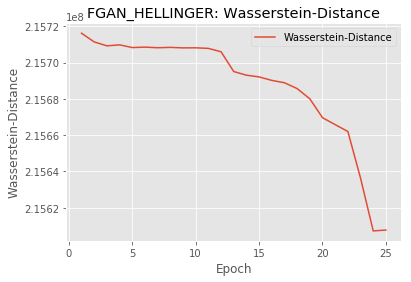

fgan_pearson mnist Wasserstein-Distance


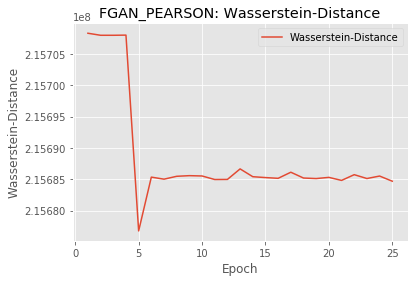

vae mnist Wasserstein-Distance


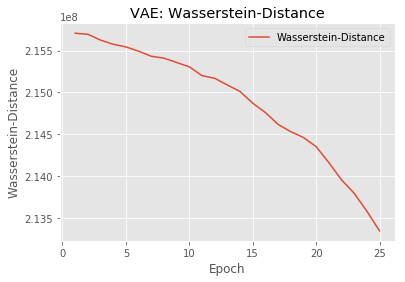

wgan mnist Energy-Distance


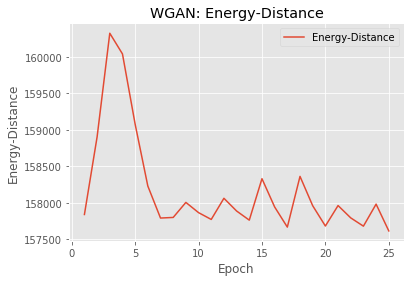

wgpgan mnist Energy-Distance


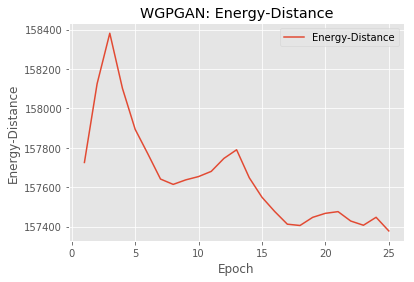

nsgan mnist Energy-Distance


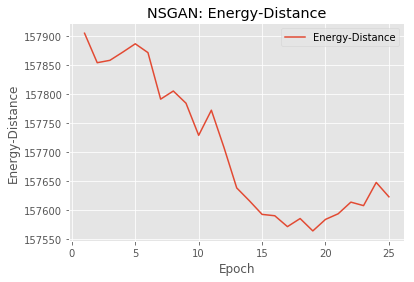

lsgan mnist Energy-Distance


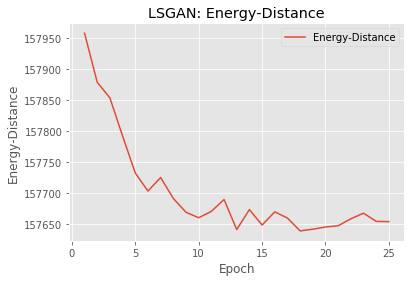

mmgan mnist Energy-Distance


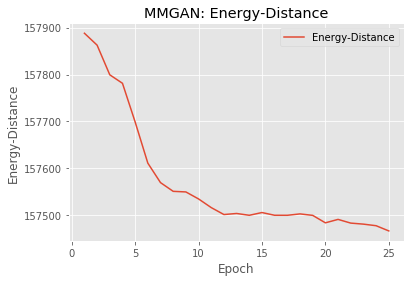

dragan mnist Energy-Distance


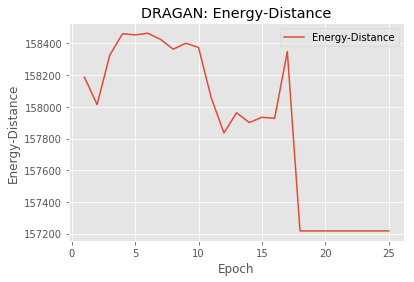

began mnist Energy-Distance


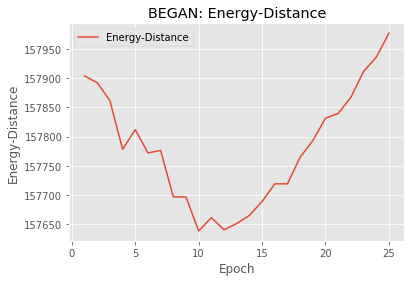

ragan mnist Energy-Distance


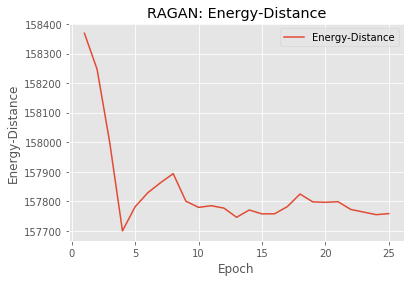

infogan mnist Energy-Distance


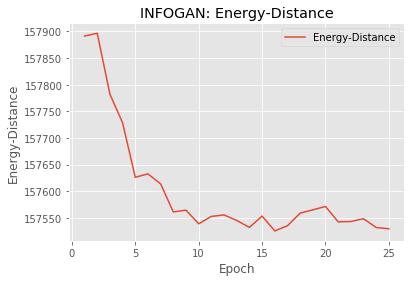

fishergan mnist Energy-Distance


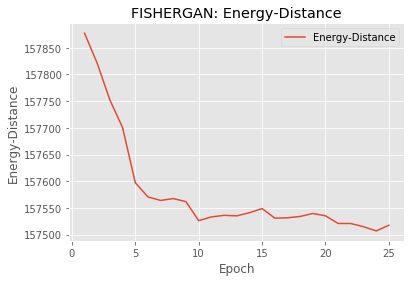

fgan_forward_kl mnist Energy-Distance


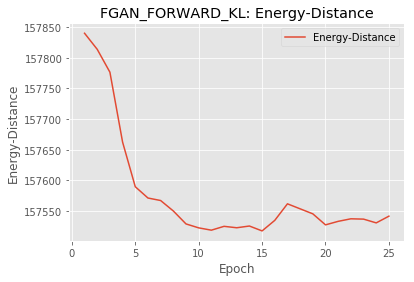

fgan_reverse_kl mnist Energy-Distance


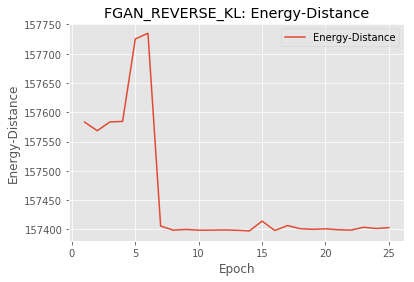

fgan_jensen_shannon mnist Energy-Distance


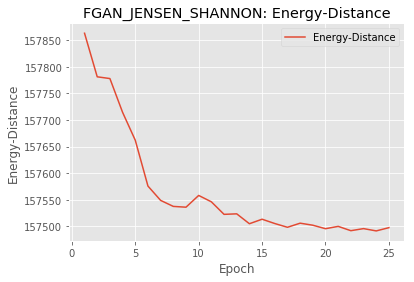

fgan_total_var mnist Energy-Distance


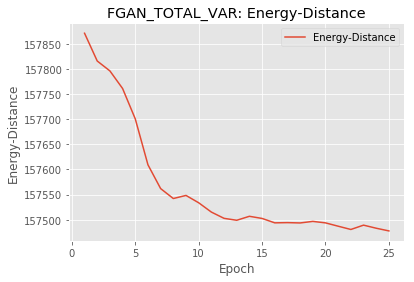

fgan_hellinger mnist Energy-Distance


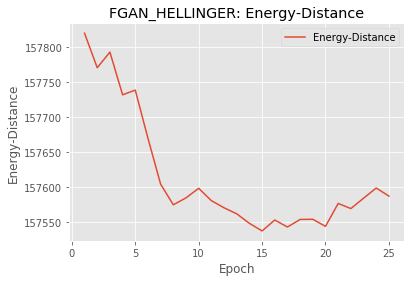

fgan_pearson mnist Energy-Distance


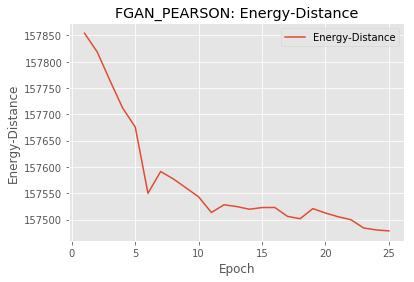

vae mnist Energy-Distance


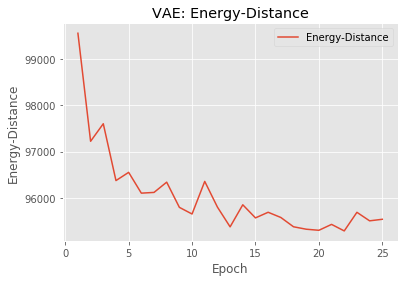

In [37]:
for metric in distance_metrics:

    for model_name in models.keys():
        if model_name == 'autoencoder':
            continue
    
        data = results[model_name]['mnist'][metric]['95']
        print(model_name, 'mnist', metric)
        
        plt.plot(np.linspace(1, 25, len(data)), data, label=metric)

        plt.xlabel("Epoch")
        plt.ylabel(metric)
        plt.title("{0}: {1}".format(model_name.upper(), metric))
        plt.legend(loc="best")
        plt.show()
#         plt.savefig('graphs/mnist/{0}_{1}.png'.format(metric, model_name), dpi=100)
#         plt.clf()

In [36]:
plt.style.use('ggplot')